### IMPORTANDO BIBLIOTECAS/MÓDULOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import joblib

### CRIANDO SÉRIE TEMPORAL

In [2]:
np.random.seed(0)
data = np.random.normal(3000,1,100)
serie = pd.DataFrame(data, columns=['Serie'])

### ANALISANDO SÉRIE TEMPORAL

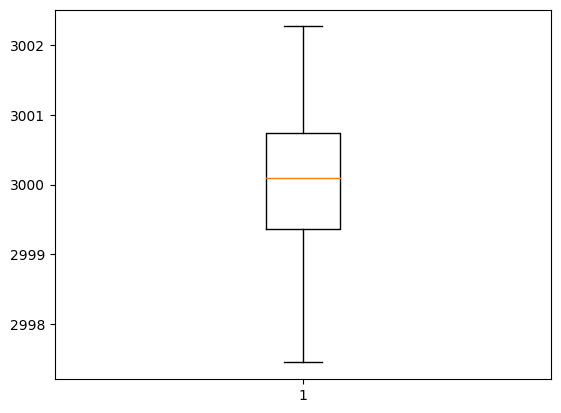

In [3]:
plt.boxplot(serie)
plt.show()

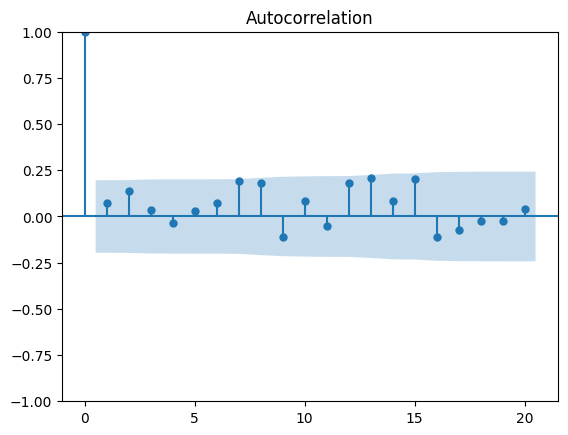

In [4]:
plot_acf(serie, lags=20)
plt.show()

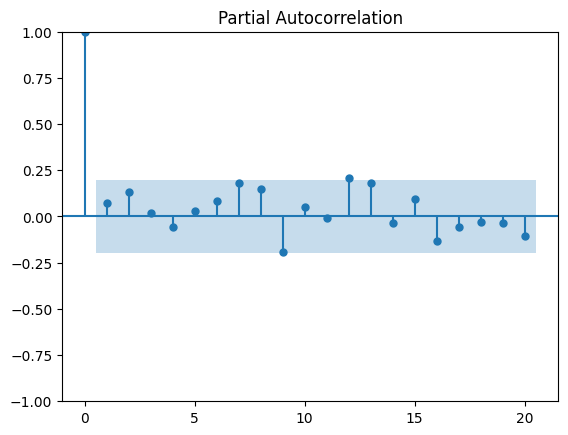

In [5]:
plot_pacf(serie, lags=20)
plt.show()

### DEFININDO BASE TREINO E TESTE

In [6]:
Total_Series = int(len(serie) * 0.5)
Treino = serie['Serie'][:Total_Series]
Teste = serie['Serie'][Total_Series:]

print(Treino.shape)
print(Teste.shape)

(50,)
(50,)


### CONFIGURANDO E TREINANDO MODELOS ARIMA E SARIMAX

###### NO MODELO ARIMA, NÃO FOI NECESSÁRIO INCLUIR DIFERENCIAÇÃO, POIS A SÉRIE É ESTACIONÁRIA, TORNANDO O MODELO COMO 'ARMA'

In [17]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sa
import warnings

warnings.filterwarnings('ignore')

order_arima = (30,0,1)
order_sa = (15,1,1)
seasonal_order = (3,0,1,16)

modelo_sa = sa.tsa.SARIMAX(Treino, order=order_sa, seasonal_order=seasonal_order)
modelo = ARIMA(Treino,order=order_arima)

modelo_fit = modelo.fit()
modelo_sa_fit = modelo_sa.fit()

### AVALIANDO TREINAMENTO DOS MODELOS ARIMA E SARIMAX

In [8]:
residuals = pd.DataFrame(modelo_fit.resid)
residuals_sa = pd.DataFrame(modelo_sa_fit.resid)

In [9]:
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Serie   No. Observations:                   50
Model:                ARIMA(30, 0, 1)   Log Likelihood                 -53.896
Date:                Fri, 01 Sep 2023   AIC                            173.791
Time:                        16:10:24   BIC                            236.888
Sample:                             0   HQIC                           197.819
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3000.1992      0.289   1.04e+04      0.000    2999.634    3000.765
ar.L1          0.0844      0.497      0.170      0.865      -0.889       1.058
ar.L2          0.1321      0.411      0.321      0.7

In [10]:
print(modelo_sa_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Serie   No. Observations:                   50
Model:             SARIMAX(15, 1, 1)x(3, 0, 1, 16)   Log Likelihood                 -61.995
Date:                             Fri, 01 Sep 2023   AIC                            165.990
Time:                                     16:10:24   BIC                            205.718
Sample:                                          0   HQIC                           181.063
                                              - 50                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5820      1.671     -0.348      0.728      -3.856       2.692
ar.L2         -0.2417      

<Axes: ylabel='Density'>

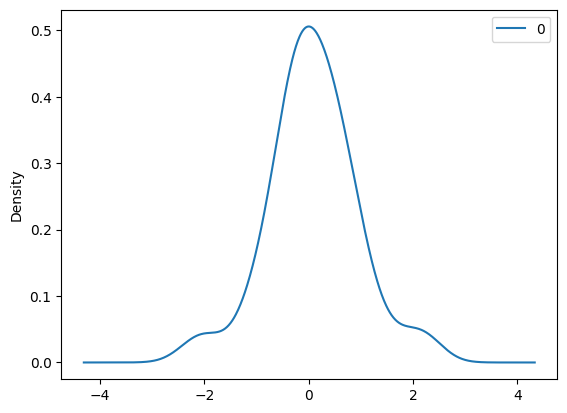

In [11]:
residuals.plot(kind='kde')

<Axes: ylabel='Density'>

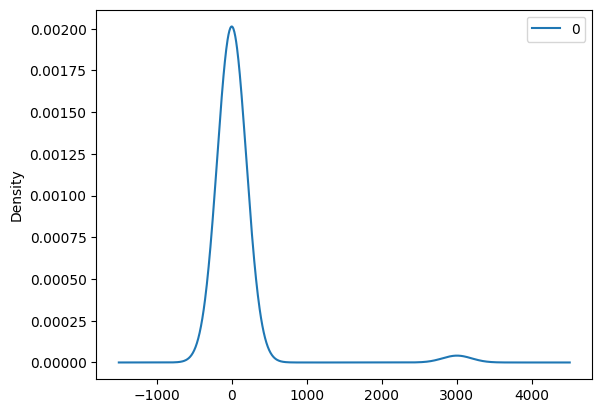

In [12]:
residuals_sa.plot(kind='kde')

### REALIZANDO PREVISÕES E COMPARANDO COM A BASE

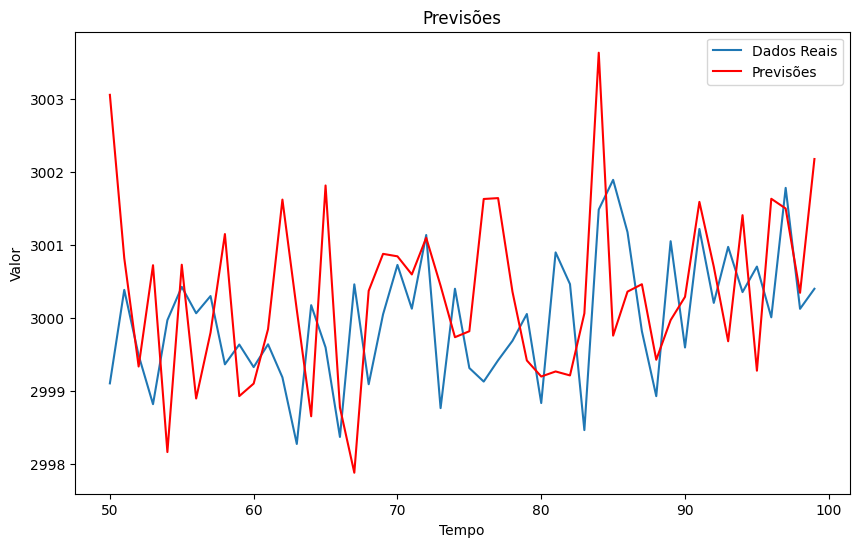

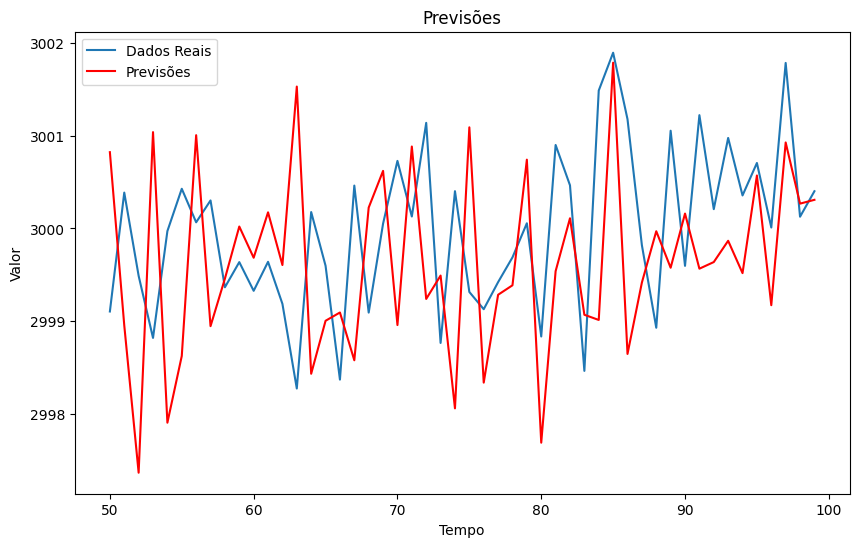

In [13]:
n_forecast = len(Teste)
forecast = modelo_fit.forecast(steps=n_forecast)
forcast_sa = modelo_sa_fit.forecast(steps=n_forecast)

modelos = [forecast,forcast_sa]

for modelo in modelos:

    plt.figure(figsize=(10, 6))
    plt.plot(Teste.index, Teste, label='Dados Reais')
    plt.plot(Teste.index, modelo, color='red', label='Previsões')
    plt.title('Previsões')
    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.legend()

### SALVANDO MODELOS

In [14]:
joblib.dump(modelo_fit,'arima.pkl')
joblib.dump(modelo_sa_fit,'sarimax.pkl')

['sarimax.pkl']

In [15]:
arima = joblib.load('arima.pkl')
sarima = joblib.load('sarimax.pkl')